# Assignment 02: Scikit Learn Basic Regression and Classification
---

**Due Date:** Friday 02/07/2025 (by 5pm)

**Please fill these in before submitting, just in case I accidentally mix up file names while grading**:

Name: Jane Student

CWID-5: (Last 5 digits of cwid)

## Introduction
--------

In this assignment you will be performing a regression and classification task using the `scikit-learn` machine learning framework, and the Python `statsmodel` library.
You should work through the tutorial on using `scikit-learn` and `statsmodel` before doing this assignment, as well as work on the materials from our units
on regression and classification tasks.

For the first part of this assignment, I recommend looking through the following tutorials on using
Scikit Learn and the statsmodel library for linear regression:

[A Beginners guide to Linear Regression in Python with Scikit-Learn](https://medium.com/analytics-vidhya/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-6b0fe70b32d7)


[Simple Linear Regression with statsmodel Library](https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/09_regression.html)

I am using this material as a reference when developing the work and questions for Task 1 below.

In [2]:
# The following ipython magic will reload changed file/modules.
# So when editing function in source code modules, you should
# be able to just rerun the cell, not restart the whole kernel.
%load_ext autoreload
%autoreload 2

In [3]:
# all imports that you use for this assignment should be placed in these next 2
# cells.  If you need to import a whole module put it here, or if importing a
# specific class or function from a module, put in the next cell.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
# By convention, we often just import the specific classes/functions in notebooks
# from scikit-learn we will need to train a model and perform prediction.
# Here we include some of the classes and functions you should need for this
# assignment from the sklearn library, but there could be other methods you might
# want to try or would be useful to the way you approach the problem, so feel free
# to import others you might need or want to try from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

# statsmodels has an api, it is often imported as sm by convention
import statsmodels.api as sm

In [5]:
# Import functions/moduls from this project.  We manually set the
# PYTHONPATH to append the location to search for this assignments
# functions to just ensure the imports are found
import sys
sys.path.append("../src")

# assignment function imports for unittests and github autograding
# these are required for assignment autograding
from assg_utils import run_unittests, run_doctests
from assg_tasks import task1_sklearn_linear_regression, task1_statsmodel_linear_regression
from assg_tasks import task2_label_encoding, task2_impute_missing_data
from assg_tasks import task2_sklearn_logistic_regression, task2_statsmodel_logistic_regression

In [6]:
# set default figure size, 8in by 6in and figure properties here for this notebook,
# please don't change these in final submission of your work
#%matplotlib notebook
plt.rcParams['figure.figsize'] = (10, 8) 

# Task 1: Linear Regression with One Variable
--------


## Load and Explore Data

There is a file named `assg-02-weather.csv` in the data subdirectory.  Load this file into a
pandas dataframe in the next cell (don't forgot to always use relative path names when working
in projects).  There are places in the assignment that assume this full dataframe is named
`df`, so use that as the name of the loaded dataframe.

Remove the stub df from this line.

In [8]:
# load file into a dataframe here, remove the stub dataframe from here
data = pd.read_csv('../data/assg-02-weather.csv')
df = pd.DataFrame(data)
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


Then do some basic data exploration on this dataframe, as we have discussed and shown in class.  Perform the following tasks:

1. Determine the number of samples in this data set.  Determine the number of features as well.
2. Display the types of the features that were read in and determined by default by Pandas in this dataframe.
3. For the numeric data types, describe the basic information about the min, max and ranges of the numeric data
4. Count the number of missing or NaN data in the dataframe (if any), show the counts of missing data for each of the features in the dataframe.
5. It will be useful to know the feature to feature correlations.  Create and display a correlation matrix of the numeric features
   in this dataset.  You will need to extract into a temporary dataframe the numeric features to do this.  Visualizing the
   correlations using a heatmap would be a good idea since there are quite a few of them.

In [9]:
# 1. determine number of samples and number of features here
df.shape

(366, 22)

In [10]:
# 2. determine feature types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [13]:
# 3. display basic information about the range of numeric features in the data 
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


In [15]:
# 4. determine if there are any missing data in the dataset, show counts of missing data for each feature
df.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

In [16]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [17]:
# 5. show feature-to-feature correlation of the numeric features we currently have in this data
df_corr = df.drop(['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow'], axis='columns')
df_corr

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
0,8.0,24.3,0.0,3.4,6.3,30.0,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,3.6
1,14.0,26.9,3.6,4.4,9.7,39.0,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,3.6
2,13.7,23.4,3.6,5.8,3.3,85.0,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,39.8
3,13.3,15.5,39.8,7.2,9.1,54.0,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,2.8
4,7.6,16.1,2.8,5.6,10.6,50.0,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,76.0,7.0,50,38,15,1016.1,1010.8,1,3,20.4,30.0,0.0
362,7.1,28.4,0.0,11.6,12.7,48.0,2.0,19,45,22,1020.0,1016.9,0,1,17.2,28.2,0.0
363,12.5,19.9,0.0,8.4,5.3,43.0,11.0,9,63,47,1024.0,1022.8,3,2,14.5,18.3,0.0
364,12.5,26.9,0.0,5.0,7.1,46.0,6.0,28,69,39,1021.0,1016.2,6,7,15.8,25.9,0.0


## Visualize the Data

You will next create a linear regression model of the relationship between the temperature and
evaporation features of this data.  There are several temperature measurements in this dataset.  

1. Using base matplotlib, create a scatter plot of the relationship between
   the `Temp9am` and `Evaporation` recorded values.
   The temperature should be the independent variable (x axis) and evaporation measurement the dependent
   variable (y axis) in this plot.  Label your axis, you weren't given a data dictionary but
   see if you can figure out the likely units used to record temperature and evaporation in this data
   and label the axes accordingly.  

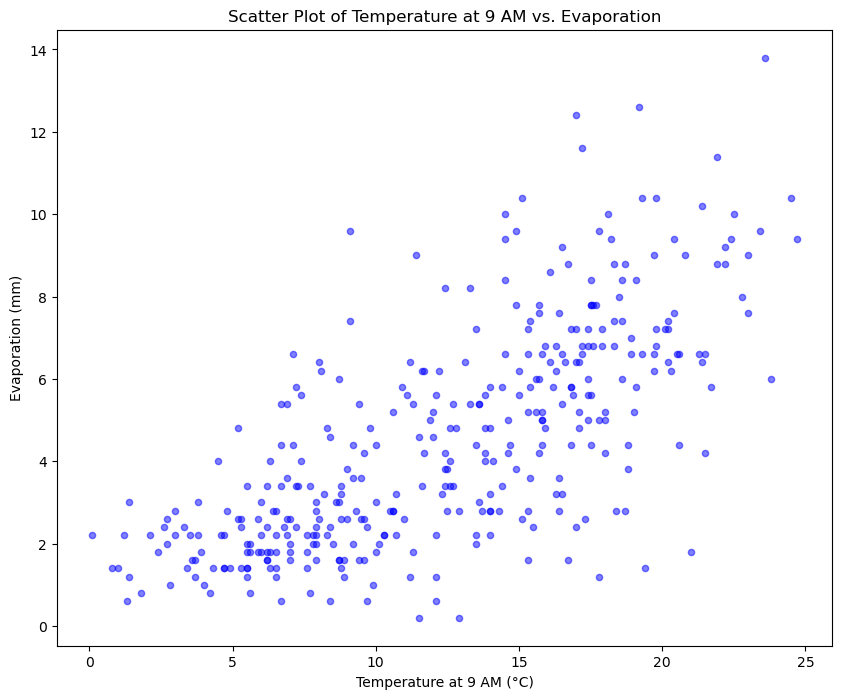

In [18]:
# create the asked for visualization here.  Make sure you use a scatter plot and label your axis
df.plot(kind='scatter', x='Temp9am', y='Evaporation', figsize=(10,8), alpha=0.5, color='blue');
plt.xlabel('Temperature at 9 AM (°C)')
plt.ylabel('Evaporation (mm)')
plt.title('Scatter Plot of Temperature at 9 AM vs. Evaporation')
plt.show()

## Build and Evaluate a Scikit-learn LinearRegression Model

You will first fit a linear regression model using the scikit-learn framework.

Create a LinearRegression model and fit all of the 9am temperature data (independent variable) to try and
predict evaporation (dependent variable). Perform the following tasks:

1. Start by extracting the 9am temperature data from a dataframe into a new numpy array called `X`.  You should reshape this array to be 2-d
   column matrix that has shape (366, 1), 366 rows, with a single column feature.
2. Also extract the evaporation dependent variable int a numpy array named `y`.  This should end up being a vector of shape (366,).
3. Complete the function called `task1_sklearn_linear_regression()` found in the `src/assg_tasks.py` file.  You will do the following in this function:
   - Implement a linear regression model using scikit-learns linear regression instance.
   - Fit the model using the  `X` inputs and `y` labels you extracted and that are passed in to this function.
   - Do not specify any metaparamters of the linear regression model, the tests expect a default linear regression is performed.
   - You need to find and return additional information from your fitted model, that is used by the tests for this first task.
     - You can get the slope and intercept directly from a fitted linear regression model parameters.
     - You need to determine the mean squared error (mse) and root mean squared error (rmse) of the fitted model to all of the data, and
       return these.
     - Also determine the models $R^2$ r squared score.  You can calculate this from the models predictions by hand, or there is a function
       that will return the fitted models r squared score.
     - Return the model and the asked for measurements of your fit.  You need to pass the tests of your model fit and expected performance before
       continuing on to the next task.
4. Replot the scatter plot of your data.  But show the fitted line from the linear regression on the model.
   Label the axis the same as before.  But this time include a legend.  Make sure the data is plotted as scatter
   plot points and identified as suche in the figure.  Also plot the model as a line and identify it in the legend.
   Make your figure look like the following.  The regression model line you obtain should
   (exactly) match the one shown in this figure.

![Regression Model Result](../figures/assg-02-regression-result.png)

In [19]:
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean())

In [20]:
# 1. extract the X input feature for the linear regression, ensure it is a numpy
# array of the correct expected shape, remove/replace the X declaration here
X = df['Temp9am'].values.reshape(-1, 1)
X.shape

(366, 1)

In [21]:
# 2. extract the y target regression labels, ensure it is a numpy vector, remove/replace
# the y declaration here
y = df['Evaporation'].values
y.shape

(366,)

In [22]:
# 3. your work should go into the src/assg_tasks.py function named task1_sklearn_linear_regression()
# This cell must not be removed or modified, it calls your function to create a model and
# return the fitted parameters from the regression, and it runs unit tests to see if your
# model fit matches the expected fit you should get
model, intercept, slope, mse, rmse, rsquared = task1_sklearn_linear_regression(X, y)

# run the unit tests so you can see if your fitted model got the expected results
# if any of these tests do not pass (don't get ok result) you have done something
# wrong in creating your data and/or fitting your model and extracting the
# fit parameters
run_unittests(['test_task1_sklearn_linear_regression']);

test_intercept (test_assg_tasks.test_task1_sklearn_linear_regression.test_intercept)
test_intercept ... ok
test_model (test_assg_tasks.test_task1_sklearn_linear_regression.test_model)
test_model ... ok
test_mse (test_assg_tasks.test_task1_sklearn_linear_regression.test_mse)
test_mse ... ok
test_rmse (test_assg_tasks.test_task1_sklearn_linear_regression.test_rmse)
test_rmse ... ok
test_rsquared (test_assg_tasks.test_task1_sklearn_linear_regression.test_rsquared)
test_rsquared ... ok
test_slope (test_assg_tasks.test_task1_sklearn_linear_regression.test_slope)
test_slope ... ok

----------------------------------------------------------------------
Ran 6 tests in 0.376s

OK


In [23]:
# You don't have to do anything here, these will display the model fit parameters
# you return from your function.  You can compare your parameters and results to
# the expected unit test results in the src/test_assg_tasks.py file
print('sklearn intercept: ', intercept)
print('sklearn slope:     ', slope)
print('sklearn mse:       ', mse)
print('sklearn rmse:      ', rmse)
print('sklearn R^2 score: ', rsquared)

sklearn intercept:  0.37578175021210747
sklearn slope:      0.3354845860060065
sklearn mse:        3.5473465427798607
sklearn rmse:       1.8834400820784984
sklearn R^2 score:  0.5008050204985712


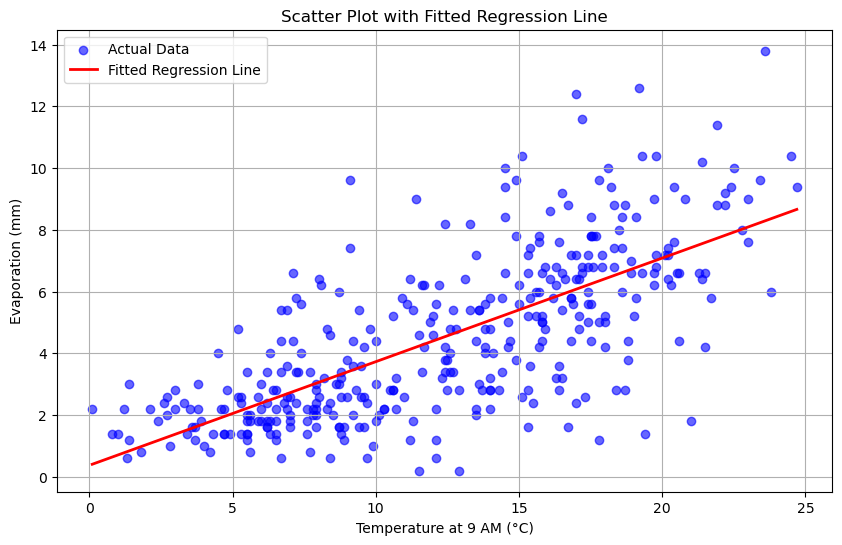

In [24]:
# 4. replot scatter plot of data adding in fitted regression model line to plot
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # Create range for smooth line
y_pred = model.predict(X_range)

# Step 4: Plot Scatter plot + Regression Line
plt.figure(figsize=(10, 6))
plt.scatter(df['Temp9am'], df['Evaporation'], alpha=0.6, label='Actual Data', color='blue')
plt.plot(X_range, y_pred, color='red', label='Fitted Regression Line', linewidth=2)

# Step 5: Formatting plot
plt.xlabel('Temperature at 9 AM (°C)')
plt.ylabel('Evaporation (mm)')
plt.title('Scatter Plot with Fitted Regression Line')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

## Build and Evaluate a statsmodel ordinary least squares Model

For comparison, you will next use the `statsmodel` library to perform a linear regression on the same
independent variable (temperature at 9am) to predict evaporation.  You should already have successfully
extracted the inputs and the target regression labels into numpy arrays named `X` and `y` respectively in
the previous part of this tadk.

Perform the following tasks to fit a statsmodel linear regression:

1. Create and fit a `statsmodel` `OLS` (ordinary least squared) regression of the data.  You will need
   to correctly use the `statsmodel` API here as discussed.  Also don't forget that, for reasons, you
   will need to create a dummy intercept term for your input data for the statsmodel OLS
   - You need to implement the creation of the model in the `task1_statsmodel_linear_regerssion()` function (found in `src/assg_tasks.py`.  This function should fit
     the described model and reutrn it along with the fitted `intercept, slope, mse, rmse and rsquared` values in order
     to pass all of the doctests that are performed.
   - You may need to read documentation and explore the help system to find out how to obtain the intercept, slope and rsquared values
     from an `OLS` fitted model.  You will need to calculate the mse and rmse using the fitted models predictions as you did previously.
   - Again use a default `stasdmodel` `OLS` instance, do not specify any metaparameters when creating your model instance to fit.
2. Use the statsmodel summary function to display this same information (and more) about the fitted model that is returned.

In [27]:
# your work should go into the src/assg_tasks.py function named task1_statsmodel_linear_regerssion()
# This cell must not be removed or modified, it calls your function to create a model and
# return the fitted parameters from the regression, and it runs doctests to see if your
# model fit matches the expected fit you should get
model, intercept, slope, mse, rmse, rsquared = task1_statsmodel_linear_regression(y, X)

# run the unit tests so you can see if your fitted model got the expected results
# if any of these tests do not pass (don't get ok result) you have done something
# wrong in creating your data and/or fitting your model and extracting the
# fit parameters
run_unittests(['test_task1_statsmodel_linear_regression']);

test_intercept (test_assg_tasks.test_task1_statsmodel_linear_regression.test_intercept)
test_intercept ... ok
test_model (test_assg_tasks.test_task1_statsmodel_linear_regression.test_model)
test_model ... ok
test_mse (test_assg_tasks.test_task1_statsmodel_linear_regression.test_mse)
test_mse ... ok
test_rmse (test_assg_tasks.test_task1_statsmodel_linear_regression.test_rmse)
test_rmse ... ok
test_rsquared (test_assg_tasks.test_task1_statsmodel_linear_regression.test_rsquared)
test_rsquared ... ok
test_slope (test_assg_tasks.test_task1_statsmodel_linear_regression.test_slope)
test_slope ... ok

----------------------------------------------------------------------
Ran 6 tests in 0.155s

OK


In [26]:
# 2. Determine the model parameter slope and intercept terms as well as the rsquared fit result
# and return these along with the model.  You don't have to do anything in this cell, the
# returned parameters displayed should match the expected values for the unit tests found in
# src/test_assg_tasks.py
print('statsmodel intercept: ', intercept)
print('statsmodel slope:     ', slope)
print('statsmodel mse:       ', mse)
print('statsmodel rmse:      ', rmse)
print('statsmodel R^2 score: ', rsquared)

statsmodel intercept:  0.37578175021210747
statsmodel slope:      0.3354845860060065
statsmodel mse:        3.5473465427798607
statsmodel rmse:       1.8834400820784984
statsmodel R^2 score:  0.5008050204985712


In [20]:
# 3. display summary information about the statsmodel OLS linear regression model fit

As shown here, the fitted model parameters and $R^2$ score both should exactly match
the results obtained by scikit-learn when fitting using default linear regression.  We
can see further information about the fit from the statsmodel summary.  The p-value and interval
given for the const and x1 parameters show the 95% confidence interval of the fitted coefficients.


# Task 2: Binary Classification using Logistic Classifier
--------

## Encode Categorical Variables

The weather dataset you were given contains several categorical variables.  We will try and build
a binary classifier on the `RainTomorrow` attribute.  Perform the following tasks:

1. Verify that the rain tomorrow attribute is in fact a binary categorical variable. For example, use
   methods to determine all of the unique values and count how many of each you have for that attribute.
2. Create a simple pipeline to encode the rain tomorrow attribute as ordinal (integer) values.  Make sure 
   that "No" rain tomorrow is encoded as the false or 0 value, and "Yes" rain tomorrow
   is encoded as the true or 1 value. (Hint there are more No rains than Yes rains targets in this data, so
   should be more 0 encodings).
4. Encode the rain tomorrow as a categorical variable.  Save the results in a dataframe or numpy array
   (you will need to call the targets `y` again for the unit tests) to use as the target values for training.
5. To double check, verify that no is encoded as 0 or false and yes as 1 or true after you encode the
   categorical variable.


In [216]:
# 1. verify that the rain tomorrow string attribute is a binary categorical variable by
#    determining all unique categories and counting the number of each unique category
unique_values = df['RainTomorrow'].unique()
value_counts = df['RainTomorrow'].value_counts()

# Print results
print("Unique categories:", unique_values)
print("\nCounts of each category:\n", value_counts)

Unique categories: [1 0]

Counts of each category:
 RainTomorrow
0    300
1     66
Name: count, dtype: int64


In [217]:
# 2. create ordinal encoder pipeline to encode the rain tomorrow attribute
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [218]:
# 3. encode the rain tomorrow as categorical variables and save result in array
#    array y or labels for training
y = ordinal_encoder.fit_transform(df[['RainTomorrow']])

In [219]:
# 4. double check that no is encoded as 0 and yes as 1 in ordinal encoding
unique, counts = np.unique(df['RainTomorrow'], return_counts=True)
print(unique)
print(counts)

[0 1]
[300  66]


To test that you performed the encoding correctly, your `y` will be passed through the
`task2_label_tests()` doctests to see if the expected types and encodings have been
as described.

Now implement the function named `task2_label_encoding` in the `src/assg_tasks.py` file.  You will be passed a dataframe with only the
`RainTomorrow` attribute in it to this function.  You need to recreate the steps you did above to create
an encoder and encode this attribute as a categorical variable.  
- You should return the resulting `y` encoded categorical labels.
- Also as before, you need to determine and return some attributes of your encoded labels including:
  - Return the number of dimensions in y, which should be 1
  - Return the shape of y, which should be a numpy vector here
  - Count and return the number of no (0) and the number of yes (1) values in your labels.

In [258]:
# your work should go into the src/assg_tasks.py function named task2_label_encoding()
# This cell must not be removed or modified
# For this test, you just need to create the y labels correctly as
# described before they are tested here
y, ndim, shape, num_no, num_yes = task2_label_encoding(df[['RainTomorrow']])

# run the unit tests so we can see if the encoded categorical labels are done as required
run_unittests(['test_task2_label_encoding']);

/workspaces/ass02/notebooks/../src/assg_tasks.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/workspaces/ass02/notebooks/../src/assg_tasks.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
test_ndim (test_assg_tasks.test_task2_label_encoding.test_ndim)
test_ndim ... ok
test_num_no (test_assg_tasks.test_task2_label_encoding.test_num_no)
test_num_no ... ok
test_num_yes (test_assg_tasks.test_task2_label_encoding.test_num_yes)
test_num_yes ... ok
test_shape (test_assg_tasks.test_task2_label_encodin

In [259]:
print('Label number of dimensions: ', ndim)
print('Label shape               : ', shape)
print('Label number of no labels : ', num_no)
print('Label number of yes labels: ', num_yes)

Label number of dimensions:  1
Label shape               :  (366,)
Label number of no labels :  300
Label number of yes labels:  66


## Impute Missing Data

We will be using the `Sunshine` and `Pressure3pm` attributes when building a classifier.
There are some missing values in one of these attributes.

1. Create a new dataframe or numpy array with only 2 features/columns, the `Sunshine`
   and `Pressure3pm` attributes.
2. Determine the number of missing values in each of the two attributes `Sunshine` and `Pressure3pm`
3. Create a simple imputer that will fill in missing values with
   the mean value of that attribute
4. Fit the imputer and use it to fill in missing values in your dataframe with only
   the two attributes we will use.
5. Confirm that there are no longer any missing values in the dataframe/numpy array you will use for
   training.

In [260]:
# 1. Create a new dataframe/numpy array with only the 2 features Sunshine and Pressure3pm
X = df[['Sunshine', 'Pressure3pm']]
print(X.head())

   Sunshine  Pressure3pm
0       6.3       1015.0
1       9.7       1008.4
2       3.3       1007.2
3       9.1       1007.0
4      10.6       1018.5


In [261]:
# 2. Determine number of missing values in Sunshine and Pressuer3pm features
X.isnull().sum()

Sunshine       3
Pressure3pm    0
dtype: int64

In [132]:
# 3. Create a simple imputer to fill in missing values with mean value of attribute
from sklearn.impute import SimpleImputer

df_new = df[['Sunshine', 'Pressure3pm']]

In [262]:
# 4. Impute missing values and fill them in with the mean of the attribute
from sklearn.impute import SimpleImputer

# Select the Sunshine and Pressure3pm columns
df_selected = df[['Sunshine', 'Pressure3pm']]

# Create a SimpleImputer instance with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the selected columns and transform the data
df_imputed = imputer.fit_transform(df_selected)

# Convert the result back to a DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=['Sunshine', 'Pressure3pm'])

# Display the imputed DataFrame
print(df_imputed.head())
df_imputed.isnull().sum()

   Sunshine  Pressure3pm
0       6.3       1015.0
1       9.7       1008.4
2       3.3       1007.2
3       9.1       1007.0
4      10.6       1018.5


Sunshine       0
Pressure3pm    0
dtype: int64

In [263]:
# 5. Confirm that there are no longer any missing values
df_imputed.isnull().sum()

Sunshine       0
Pressure3pm    0
dtype: int64

To test that you have correctly imputed the missing values with the mean, copy your work in the previous cells
into the `task2_impute_missing_data` in `src/assg_tasks.py`.  This function takes the whole dataframe as input,
so you need to extract the needed features and impute the missing data.  We expect the cleaned data to be returned
as `X`, a pandas dataframe, along with some measured values of the `X` inputs that will be tested.

In [268]:
# your work should go into the src/assg_tasks.py function named task2_impute_missing_data()
# This cell must not be removed or modified
# For this test, you just need to create the X features dataframe correctly as
# described before it is tested here, and return the properties shown for testing
X, ndim, shape, columns, na_sum = task2_impute_missing_data(df)

# run the doc tests so you can see the imputed missing values have been done correctly
run_unittests(['test_task2_impute_missing_data']);

test_columns (test_assg_tasks.test_task2_impute_missing_data.test_columns)
test_columns ... ok
test_na_sum (test_assg_tasks.test_task2_impute_missing_data.test_na_sum)
test_na_sum ... ok
test_ndim (test_assg_tasks.test_task2_impute_missing_data.test_ndim)
test_ndim ... ok
test_shape (test_assg_tasks.test_task2_impute_missing_data.test_shape)
test_shape ... ok
test_y (test_assg_tasks.test_task2_impute_missing_data.test_y)
test_y ... ok

----------------------------------------------------------------------
Ran 5 tests in 0.077s

OK


In [269]:
# you don't need to do anything in this cell, but you can check that the properties that
# you return here match those tested in the test_assg_tasks.py file for this function
print('Features number of dimensions: ', ndim)
print('Features shape               : ', shape)
print('Features columns: ')
print(columns)
print('Features na sums: ')
print(na_sum)

Features number of dimensions:  2
Features shape               :  (366, 2)
Features columns: 
Index(['Sunshine', 'Pressure3pm'], dtype='object')
Features na sums: 
Sunshine       0
Pressure3pm    0
dtype: int64


## Visualize Binary Classification Task

We will use the attributes `Sunshine` and `Pressure3pm` to try and build a binary classifier to predict
the rain tomorrow binary label.  First of all lets visualize the task.  Create a plot by performing these tasks:

1. Plot the `Sunshine` attribute as the x axis variable, and the 'Pressure3pm' attribute
   for the y axis, make sure this is a scatter plot.
2. Use shape and/or color to provide a label for each point.  Plot all points on the figure
   where rain tomorrow is yes using a shape/color, then plot all the points for no using a
   different shape/color.
3. Make sure that you create a legend that identifies the point color/shape chose for your yes/no
   category.
4. Label your x and y axis appropriately for the attributes you plotted on them.

In [163]:
# create your plot here that
# 1. scatter plot Sunshine as x axis variable and  as y axis variable
# 2. perform separate plots for samples where rain tomorrow is yes, vs. where rain tomorrow is no
#    use color/shape to differentiate these two categories in the plot
# 3. create a legend that identifies rain tomorrow yes/no points in figure
# 4. make sure you label your axes and add any other useful information to the figure

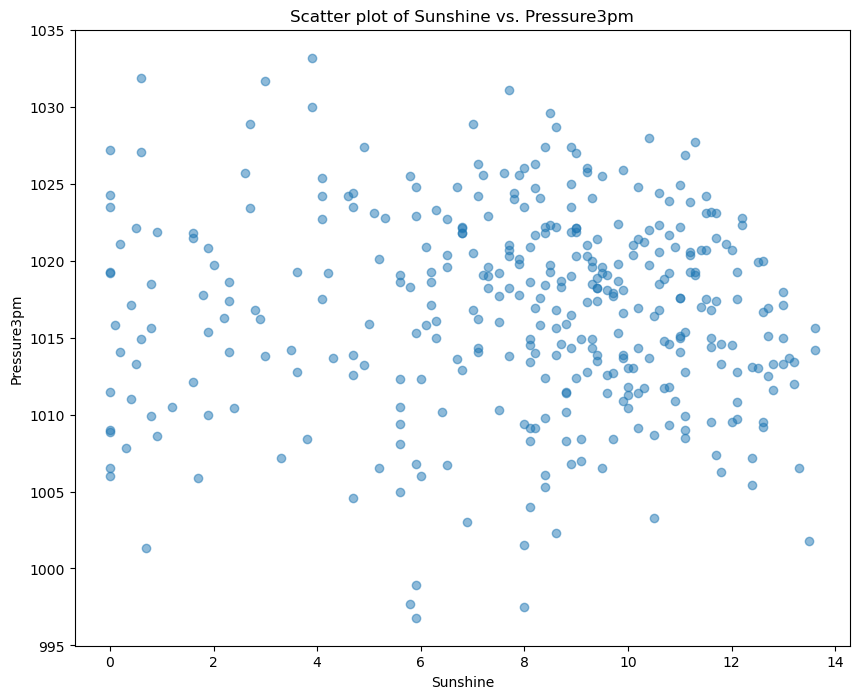

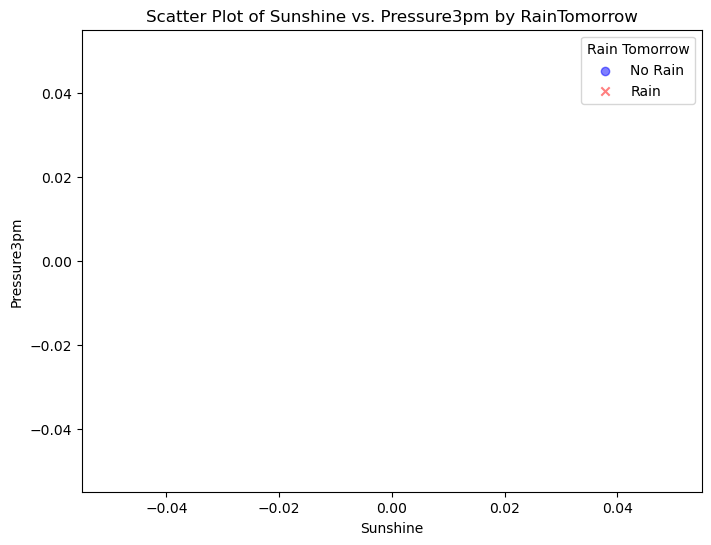

In [183]:
import matplotlib.pyplot as plt

# Ensure plots are displayed correctly in Jupyter Notebook
plt.ioff()

# Scatter Plot for All Data
plt.figure(figsize=(10,8))  
plt.scatter(df['Sunshine'], df['Pressure3pm'], alpha=0.5)
plt.xlabel('Sunshine')
plt.ylabel('Pressure3pm')
plt.title('Scatter plot of Sunshine vs. Pressure3pm')
plt.show()  

# Separate Scatter Plots for "Rain = No" and "Rain = Yes"
df_no = df[df['RainTomorrow'] == 'No']
df_yes = df[df['RainTomorrow'] == 'Yes']

# Combined Scatter Plot with Legend
plt.figure(figsize=(8,6))
plt.scatter(df_no['Sunshine'], df_no['Pressure3pm'], color='blue', label='No Rain', alpha=0.5, marker='o')
plt.scatter(df_yes['Sunshine'], df_yes['Pressure3pm'], color='red', label='Rain', alpha=0.5, marker='x')

# Labels and Title
plt.xlabel('Sunshine')
plt.ylabel('Pressure3pm')
plt.title('Scatter Plot of Sunshine vs. Pressure3pm by RainTomorrow')

# Legend
plt.legend(title='Rain Tomorrow')

# Display the final combined plot
plt.show()  

# Re-enable interactive mode (optional)
plt.ion() 

## Build Classifier using Scikit-learn LogisticRegression

Despite its name, the `LogisticRegression` method and object in scikit-learn is used
for classification tasks.  Create and fit a Logistic Regression to the `Sunshine` and
`Pressure3pm` features.  The `X` input features that were cleaned and the `y` target regression
labels matrices are assumed to have been created above and available.

Perform the following tasks:

1. Create a `LogisticRegression` using scikit-learn framework.  To make the decision boundary
   easier to visualize, use the following parameters when you create this object:
   `solver='lbfgs', C=500.0`.  These parameters also will produce a model that is almos the same as the
   one that the `statsmodel` classifier will produce.
   - You need to implement the creation of the LogisticRegression model in the `task2_sklearn()` function (found in `src/Task2sklearn.py`.  This function should fit
     the described model and reutrn it along with the fitted `intercept, slopes, accuracy` values in order
     to pass all of the doctests that are performed.
   - Fit the logistic regression model to the `Sunshine` and `Pressure3pm` attributes.  Use the X inputs
     you created before with missing values filled in. You should already have the
     y/labels created for the binary classes from before.
   - Extract and return the intercept and model coefficients found for the fitted logistic regression.
   - Extract and return the accuracy that this model achieves on all of the data you fit the model with.
2. Display a confusion matrix of the performance of this model on all of the data.

In [275]:
# your work should go into the src/assg_tasks.py function named task2_sklearn_logistic_regression()
# This cell must not be removed or modified, it calls your function to create a model and
# return the fitted parameters from the regression, and it runs doctests to see if your
# model fit matches the expected fit you should get
model, intercept, slopes, accuracy = task2_sklearn_logistic_regression(X, y)

# run the unit tests so you can see if your fitted model got the expected results
# if any of these tests do not pass (don't get ok result) you have done something
# wrong in creating your data and/or fitting your model and extracting the
# fit parameters
run_unittests(['test_task2_sklearn_logistic_regression']);

test_accuracy (test_assg_tasks.test_task2_sklearn_logistic_regression.test_accuracy)
test_accuracy ... ok
test_intercept (test_assg_tasks.test_task2_sklearn_logistic_regression.test_intercept)
test_intercept ... ok
test_model (test_assg_tasks.test_task2_sklearn_logistic_regression.test_model)
test_model ... ok
test_slopes (test_assg_tasks.test_task2_sklearn_logistic_regression.test_slopes)
test_slopes ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.083s

OK


In [276]:
# The parameters returned from your function, should match and pass the expected
# results in the tests found in src/test_assg_tasks.py for this function
print('sklearn logistic regression intercept:         ', intercept)
print('sklearn logistic regression slope coefficients:', slopes)
print('sklearn logistic regression model accuracy:    ', accuracy)

sklearn logistic regression intercept:          186.59064806897868
sklearn logistic regression slope coefficients: [-0.32088535 -0.18312011]
sklearn logistic regression model accuracy:     0.8633879781420765


In [37]:
# 2. Display a confusion matrix of the performance of the model here

## Visualize Classifier Decision Boundary

When a classification model is fit to a set of binary data, it will determine a
decision boundary.  On one side of this boundary, it predicts 'no'/'false', and on
the other side it predicts 'yes'/'true'.

You can visualize the decision boundary created by your logistic regression model.
The slope and intercept coefficients you should have displayed above will describe
the decision boundary line that was fit by the logistic regression.  When we plotted
your data, you should have used Sunshine as the x axis values, and Pressure3pm as the
y axis values.  The logistic regression model should have given you 1 intercept and 2 coefficients.
The model of the decision boundary line is thus:

\begin{equation}
0 = \text{intercept} + \text{coef}_0 \times \text{Sunshine} + \text{coef}_1 \times \text{Pressure3pm}
\end{equation}

or

\begin{equation}
0 = b + \theta_0  x + \theta_1  y
\end{equation}



Remember that we use Sunshine as our x values and Pressure3pm as our y values.  We can substitute those names
and then solve for y to get the following expression:

\begin{equation}
y = \frac{-(b + \theta_0 x)}{\theta_1}
\end{equation}

This equation allows you to determine the decision boundary line, given the intercept ($b$) of your
model and the two fitted coefficients $\theta_0 \theta_1$.  For example, to determine the line, you can
plot 2 points. The x axis Sunshine ranges from 0 to 14, so you could determine the y (Pressure3pm) location
of the decision boundary at those 2 points and draw a line on the figure to visualize the decision boundary.

You thus need to perform the following tasks to visualize the decision boundary that your fitted
logistic regression model found:

1. Replot your scatter plot figure from before of the Sunshine vs. Pressure3pm points using different markers
   for the yes rain / no rain.
2. Using the intercept and coefficient of your model, determine 2 points on the decision boundary line.  Add
   this line to the figure.
3. Make sure your legend includes a label for the decision boundary line.  Make sure axes are labeled
   and legend identifies yes, no markers and the decision boundary line.

Your resulting figure should look as close to the following as possible.  You should get the shown
decision boundary line if you use the parameters shown for your logistic regression:

![Logistic Classification Decision Boundary](../figures/assg-02-decision-boundary.png)

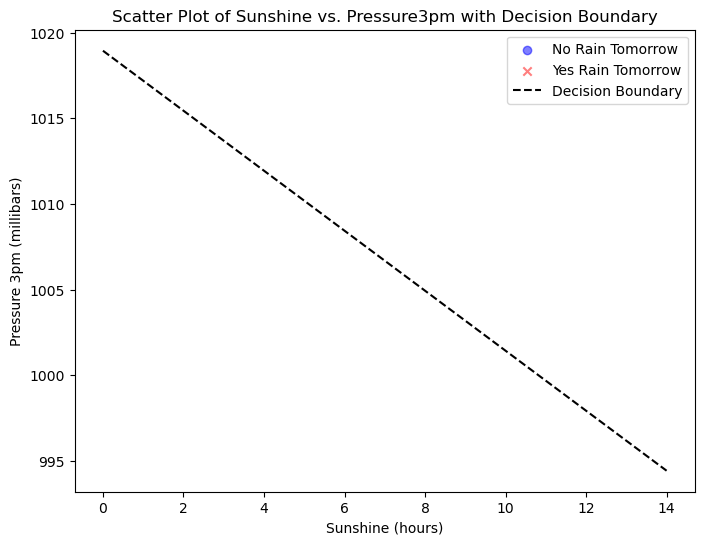

In [283]:
# put your work to recreate the visualization of the computed decision boundary here
# separate out rain vs. no rain to plot separately
import numpy as np
import matplotlib.pyplot as plt

# Scatter plot of data points
plt.figure(figsize=(8, 6))
plt.scatter(df_no['Sunshine'], df_no['Pressure3pm'], color='blue', label='No Rain Tomorrow', alpha=0.5, marker='o')
plt.scatter(df_yes['Sunshine'], df_yes['Pressure3pm'], color='red', label='Yes Rain Tomorrow', alpha=0.5, marker='x')

# Compute decision boundary line
x_vals = np.array([0, 14])  # Sunshine range
y_vals = -(intercept + slopes[0] * x_vals) / slopes[1]  # Compute Pressure3pm using decision boundary equation

# Plot the decision boundary
plt.plot(x_vals, y_vals, color='black', linestyle='dashed', label='Decision Boundary')

# Labels and Title
plt.xlabel('Sunshine (hours)')
plt.ylabel('Pressure 3pm (millibars)')
plt.title('Scatter Plot of Sunshine vs. Pressure3pm with Decision Boundary')

# Legend
plt.legend()

# Display plot
plt.show()

## Build Classifier using statsmodel Logit

We will also demonstrate building a binary classifier using the statsmodel library.
Perform the following:

1. Create a statsmodel Logit instance and fit it to your two features  and binary category labels.
   Remember that the api for statsmodel reverses the order of the inputs and the labels when fitting.
   Do not change any of the default metaparamters of the Logit, use the default settings for this model.
   - You need to implement the creation of the statsmodel logiistic regression model
     in the `task2_statsmodel()` function (found in `src/Task2statsmodel.py`).
   - This function should fit the described model and reutrn it along with the fitted `params, accuracy` values
     in order to pass all of the doctests that are performed.
   - Fit the logistic regression model to the Sunshine and Pressure3pm attributes. Use the X inputs you created before with missing values filled in.
     You should already have the y/labels created for the binary classes from before.
   - You should pass in the `X` unmodified, but don't forget that you need to add a dummy constant term
     to the features array to be used by `statsmodel`
   - Extract and return the intercept and model parameters found for the fitted logistic regression.
   - Extract and return the accuracy that this model achieves on all of the data you fit the model with.
2. Display a summary of the fitted model obtained by the statsmodel Logit
3. Compare results from statsmodel and scikit learn.  Did they get an equivalent model?

In [284]:
# your work should go into the src/Task2statsmodel function named task2_statsmodel()
# This cell must not be removed or modified, it calls your function to create a model and
# return the fitted parameters from the regression, and it runs doctests to see if your
# model fit matches the expected fit you should get
model, intercept, slopes, accuracy = task2_statsmodel_logistic_regression(y, X)

# run the unit tests so you can see if your fitted model got the expected results
# if any of these tests do not pass (don't get ok result) you have done something
# wrong in creating your data and/or fitting your model and extracting the
# fit parameters
run_unittests(['test_task2_statsmodel_logistic_regression']);

test_accuracy (test_assg_tasks.test_task2_statsmodel_logistic_regression.test_accuracy)
test_accuracy ... ok
test_intercept (test_assg_tasks.test_task2_statsmodel_logistic_regression.test_intercept)
test_intercept ... ok
test_model (test_assg_tasks.test_task2_statsmodel_logistic_regression.test_model)
test_model ... ok
test_slopes (test_assg_tasks.test_task2_statsmodel_logistic_regression.test_slopes)
test_slopes ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.116s

OK


In [285]:
# The parameters returned from your function, should match and pass the expected
# results in the src/test_assg_tasks.py unit tests of this function
print('statsmodel logistic regression intercept:         ', intercept)
print('statsmodel logistic regression slope coefficients:', slopes)
print('statsmodel logistic regression model accuracy:    ', accuracy)

statsmodel logistic regression intercept:          186.59040174670466
statsmodel logistic regression slope coefficients: Sunshine      -0.320883
Pressure3pm   -0.183120
dtype: float64
statsmodel logistic regression model accuracy:     0.8633879781420765


In [301]:
# # 2. Display a summary of the statsmodel fit here
# pred_probs = model.predict(X_with_intercept)
# def prob_to_category(pred_probs):
#     """We expect a samples X 10 shaped numpy array of prediction probabilities for the
#     10 categories.  We return a samples x 1 shaped vector of the corresponding category label
#     """
#     return np.argmax(pred_probs, axis=1)

# def score(pred, y):
#     """Given a vector of predictions and a a vector of correct labels y,
#     determine the score or prediction accuracy.
#     """
#     n = y.shape[0] # number of samples
#     correct_labels = (pred == y)
    
#     # return the accuracy ration, number correct / number of samples
#     return np.sum(correct_labels) / n

# pred_probs = model.predict(X_with_intercept)
# predictions = prob_to_category(pred_probs)

# # the score for a statsmodels logistic regressor
# accuracy = score(predictions, y)
# print("training accuracy", accuracy)

**Compare the Results**

Discuss and compare the two classifiers.  Are the parameters obtained the same?  Do they
achieve the same accuracy?

## Extra: Improve the Classifier
--------

I may give a point or to back of missed points on the assignment for doing the following.
We only used 2 features in our classifier because that makes it possible to visualize the
decision boundary.  However, the RISK_MM feature is highly correlated with the rain tomorrow
binary label we are trying to predict.

Create a logistic regression model (you can use either scikit-learn or statsmodel or both).  But this
time train with the RISK_MM, along with the other two features we used before.  Report accuracy and confusion matrix for this model.  If interested, you can look at the correlation of other features
given in the dataset, and try adding others besides these 3 to see if you can get further improvements.

In [298]:
# extra credit work adding in RISK_MM feature here

# X = df[['Sunshine']]  # I added RISK_MM                    #contains NaN when tested alone with RainTomorrow
# X = df[['Pressure3pm']]  # I added RISK_MM               # doesn't contain NaN when tested with RainTomorrow
# X = df[['RISK_MM']]  # I added RISK_MM                   # doesn't contain NaN when tested with RainTomorrow

# Select the features and target variable
X = df[['Sunshine', 'Pressure3pm', 'RISK_MM']]
y = df['RainTomorrow']  # Target variable

# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)  # Returns a NumPy array

# Create and train the logistic regression model
model = LogisticRegression(solver='lbfgs', C=500.0)
model.fit(X_imputed, y)

# Predictions and performance evaluation
y_pred = model.predict(X_imputed)
accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)

# Print results
print("Model Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Model Accuracy: 1.0
Confusion Matrix:
 [[300   0]
 [  0  66]]
